In [1]:
import pandas as pd
# extract the file download from kaggle
import zipfile
# Download the dataset programatically from Kaggle
import kaggle
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download dataset from Kaggle using Kaggle API
!kaggle datasets download -d yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring


  0%|          | 0.00/5.28M [00:00<?, ?B/s]
 19%|█▉        | 1.00M/5.28M [00:00<00:02, 1.64MB/s]
 38%|███▊      | 2.00M/5.28M [00:00<00:01, 2.92MB/s]
 57%|█████▋    | 3.00M/5.28M [00:00<00:00, 4.08MB/s]
 76%|███████▌  | 4.00M/5.28M [00:01<00:00, 5.33MB/s]
 95%|█████████▍| 5.00M/5.28M [00:01<00:00, 6.26MB/s]
100%|██████████| 5.28M/5.28M [00:01<00:00, 4.68MB/s]


In [3]:
# extract the file from the downloaded zip file
zipfile_name = 'fifa-21-messy-raw-dataset-for-cleaning-exploring.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
# read in the CSV file
fifa21_df = pd.read_csv('fifa21_raw_data.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10160\162195674.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa21_df = pd.read_csv('fifa21_raw_data.csv')


In [5]:
# Explore the data
fifa21_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [6]:
fifa21_df.shape

(18979, 77)

In [7]:
fifa21_df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [8]:
# Drop Columns aren't needed
column_to_drop = ['playerUrl', 'photoUrl','Loan Date End']
fifa21_df = fifa21_df.drop(columns= column_to_drop)

In [9]:
#Do the height and weight columns have the appropriate data types?
fifa21_df.dtypes[['Height', 'Weight']]

Height    object
Weight    object
dtype: object

In [10]:
# Convert height from feet and inches to centimeters and handle errors
def height_to_cm(height_str):
    if not isinstance(height_str,str):
        return None # return None for non-string values
    height_str = height_str[:-1]
    try:
        feet,inches = height_str.split("'")
        total_inches = int(feet)*12 + int(inches)
        height_cm = total_inches * 2.54
        return round(height_cm,0)
    except(ValueError,TypeError):
        return None # Return None for invalid or missing values 

fifa21_df['Height'] = fifa21_df['Height'].apply(height_to_cm)
fifa21_df['Height'].head()

0    170.0
1    188.0
2    188.0
3    180.0
4    175.0
Name: Height, dtype: float64

In [11]:
# convert weight from lbt to kg
def weight_to_kg(weight_str):
    if not isinstance(weight_str, str):
        return None
    weight_str = weight_str[:-3]
    try:
        weight_kg = int(weight_str) * 0.45359237
        return round(weight_kg,0)
    except(ValueError, TypeError):
        return None 
fifa21_df['Weight'] = fifa21_df['Weight'].apply(weight_to_kg)
fifa21_df['Weight'].head()

0    72.0
1    83.0
2    87.0
3    70.0
4    68.0
Name: Weight, dtype: float64

In [12]:
# Rename Height and Weight column
fifa21_df.rename(columns = {'Height':'Height (cm)', 'Weight': 'Weight (kg)'},inplace=True)


In [13]:
fifa21_df[['Height (cm)', 'Weight (kg)']]

,Height (cm),Weight (kg)
0,170.0,72.0
1,188.0,83.0
2,188.0,87.0
3,180.0,70.0
4,175.0,68.0
...,...,...
18974,178.0,70.0
18975,170.0,58.0
18976,178.0,66.0
18977,175.0,65.0


In [14]:
# Separate the joined column into year, month and days columns?
fifa21_df[['Month_Joined', 'Day_Joined', 'Year_Joined']]=fifa21_df['Joined'].str.split(' ', expand= True)
fifa21_df['Day_Joined'] = fifa21_df['Day_Joined'].str.replace(',', "").astype(int)
fifa21_df['Year_Joined']=fifa21_df['Year_Joined'].astype(int)
fifa21_df['Month_Joined']= pd.to_datetime(fifa21_df['Month_Joined'], format='%b').dt.month

In [15]:
fifa21_df[['Month_Joined', 'Day_Joined', 'Year_Joined']]

,Month_Joined,Day_Joined,Year_Joined
0,7,1,2004
1,7,10,2018
2,7,16,2014
3,8,30,2015
4,8,3,2017
...,...,...,...
18974,8,1,2020
18975,8,1,2020
18976,7,13,2018
18977,8,1,2020


In [16]:
# Convert the date column to a datetime object
fifa21_df['Joined'] = pd.to_datetime(fifa21_df['Joined'])


# Format the datetime object as a string in the desired format
fifa21_df['Date'] = fifa21_df['Joined'].dt.strftime('%Y-%m-%d')
fifa21_df['Date']


0        2004-07-01
1        2018-07-10
2        2014-07-16
3        2015-08-30
4        2017-08-03
            ...    
18974    2020-08-01
18975    2020-08-01
18976    2018-07-13
18977    2020-08-01
18978    2020-01-01
Name: Date, Length: 18979, dtype: object

In [17]:
# Clean and transform the value, wage and release clause columns into columns of integers
fifa21_df[['Value', 'Wage', 'Release Clause']]

,Value,Wage,Release Clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M
...,...,...,...
18974,€35K,€1K,€57K
18975,€60K,€500,€165K
18976,€40K,€1K,€70K
18977,€60K,€500,€165K


In [18]:
fifa21_df['Value'].unique()

array(['€67.5M', '€46M', '€75M', '€87M', '€90M', '€80M', '€105.5M',
       '€62.5M', '€78M', '€75.5M', '€69.5M', '€59.5M', '€56M', '€29M',
       '€53M', '€24.5M', '€51M', '€65M', '€71M', '€53.5M', '€72.5M',
       '€50M', '€58M', '€55M', '€16M', '€60M', '€63M', '€54.5M', '€52M',
       '€52.5M', '€50.5M', '€27M', '€48.5M', '€38M', '€45M', '€34M',
       '€39M', '€31.5M', '€15.5M', '€28M', '€46.5M', '€42M', '€32M',
       '€36.5M', '€33M', '€28.5M', '€22.5M', '€21M', '€34.5M', '€57M',
       '€49.5M', '€44.5M', '€44M', '€41.5M', '€49M', '€51.5M', '€39.5M',
       '€47.5M', '€37.5M', '€40.5M', '€33.5M', '€37M', '€30.5M', '€26M',
       '€18M', '€14.5M', '€35.5M', '€24M', '€11.5M', '€41M', '€42.5M',
       '€30M', '€36M', '€31M', '€27.5M', '€35M', '€38.5M', '€23M', '€25M',
       '€29.5M', '€25.5M', '€32.5M', '€19M', '€19.5M', '€23.5M', '€15M',
       '€17M', '€11M', '€9.5M', '€22M', '€16.5M', '€18.5M', '€17.5M',
       '€21.5M', '€20.5M', '€13.5M', '€20M', '€12M', '€12.5M', '€7M',
     

In [19]:
# Convert Value column to intergers: 
def convert_value(value):
    if value[-1] == 'M':
        return int(float(value[1:-1])* 1000000)
    elif value[-1] == 'K':
        return int(float(value[1:-1])* 1000)
    else:
        return int(value[1:])

fifa21_df['Value'] = fifa21_df['Value'].apply(convert_value)
fifa21_df['Value']
    

0        67500000
1        46000000
2        75000000
3        87000000
4        90000000
           ...   
18974       35000
18975       60000
18976       40000
18977       60000
18978       60000
Name: Value, Length: 18979, dtype: int64

In [20]:
fifa21_df['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€160K',
       '€250K', '€210K', '€260K', '€310K', '€350K', '€300K', '€190K',
       '€145K', '€195K', '€140K', '€100K', '€82K', '€110K', '€230K',
       '€155K', '€200K', '€165K', '€290K', '€170K', '€105K', '€115K',
       '€94K', '€135K', '€150K', '€130K', '€93K', '€55K', '€58K', '€80K',
       '€34K', '€120K', '€99K', '€92K', '€59K', '€65K', '€56K', '€98K',
       '€47K', '€96K', '€18K', '€70K', '€75K', '€84K', '€27K', '€20K',
       '€86K', '€77K', '€74K', '€91K', '€25K', '€46K', '€67K', '€85K',
       '€175K', '€90K', '€79K', '€83K', '€54K', '€43K', '€49K', '€45K',
       '€41K', '€500', '€39K', '€38K', '€23K', '€87K', '€57K', '€51K',
       '€50K', '€95K', '€73K', '€78K', '€69K', '€30K', '€31K', '€53K',
       '€63K', '€35K', '€71K', '€21K', '€14K', '€17K', '€33K', '€28K',
       '€32K', '€89K', '€68K', '€36K', '€64K', '€26K', '€72K', '€48K',
       '€76K', '€40K', '€29K', '€16K', '€37K', '€24K', '€97K', '€0',
       '

In [21]:
# Convert Wage column to intergers: 
def convert_wage(wage):
    if wage[-1] == 'K':
        return int(float(wage[1:-1])*1000)
    else:
        return int(float(wage[1:]))
fifa21_df['Wage'] = fifa21_df['Wage'].apply(convert_wage)
fifa21_df['Wage']

0        560000
1        220000
2        125000
3        370000
4        270000
          ...  
18974      1000
18975       500
18976      1000
18977       500
18978       500
Name: Wage, Length: 18979, dtype: int64

In [22]:
# Convert Release Clause
def convert_release (release):
    if release[-1]== 'M':
        return int(float(release[1:-1])*1000000)
    elif release[-1] == 'K':
        return int(float(release[1:-1])*1000)
    else:
        return int(float(release[1:]))
fifa21_df['Release Clause'] = fifa21_df['Release Clause'].apply(convert_release)
fifa21_df['Release Clause']

0        138400000
1         75900000
2        159400000
3        161000000
4        166500000
           ...    
18974        57000
18975       165000
18976        70000
18977       165000
18978       167000
Name: Release Clause, Length: 18979, dtype: int64

In [23]:
#remove the newline characters from the Hits column

fifa21_df['Hits'].unique()

array(['\n372', '\n344', '\n86', '\n163', '\n273', '\n182', '\n646',
       '\n79', '\n164', '\n170', '\n93', '\n131', '\n89', '\n90', '\n169',
       '\n187', '\n103', '\n317', '\n239', '\n56', '\n130', '\n229',
       '\n124', '\n172', '\n114', '\n46', '\n663', '\n479', '\n203',
       '\n198', '\n122', '\n565', '\n152', '\n140', '\n276', '\n209',
       '\n25', '\n136', '\n109', '\n139', '\n42', '\n99', '\n137',
       '\n166', '\n80', '\n104', '\n150', '\n112', '\n285', '\n133',
       '\n96', '\n69', '\n143', '\n100', '\n38', '\n83', '\n67', '\n207',
       '\n416', '\n315', '\n206', '\n424', '\n191', '\n454', '\n271',
       '\n249', '\n121', '\n246', '\n171', '\n148', '\n329', '\n70',
       '\n97', '\n73', '\n210', '\n82', '\n146', '\n62', '\n165', '\n129',
       '\n162', '\n35', '\n65', '\n47', '\n77', '\n106', '\n84', '\n1.3K',
       '\n310', '\n181', '\n364', '\n200', '\n141', '\n134', '\n259',
       '\n309', '\n367', '\n224', '\n211', '\n60', '\n176', '\n108',
       '\n

In [24]:
fifa21_df['Hits'] = fifa21_df['Hits'].apply(lambda x: x.strip() if isinstance(x, str) else x)
def convert_hits(hits):
    if pd.isna(hits):
        return 0
    elif isinstance(hits, str) and "K" in hits:
        hit_convert = hits.replace('K', "")
        hit_convert = int(float(hit_convert) * 1000)
        return round(hit_convert)
    else:
        return int(hits)
fifa21_df['Hits'] = fifa21_df['Hits'].apply(convert_hits)
fifa21_df['Hits']

0        372
1        344
2         86
3        163
4        273
        ... 
18974      2
18975      3
18976      3
18977      5
18978      2
Name: Hits, Length: 18979, dtype: int64

In [25]:
# separate the Team & Contract column into separate team and contract duration columns
fifa21_df['Team & Contract']

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: Team & Contract, Length: 18979, dtype: object

In [26]:
fifa21_df[['Team', 'Contract Duration']] = fifa21_df['Team & Contract'].str.split('\n').apply(pd.Series)[[4,5]]
# remove unnecessary spaces from the new columns
fifa21_df['Team'] = fifa21_df['Team'].str.strip()
fifa21_df['Contract Duration'] = fifa21_df['Contract Duration'].str.strip()
fifa21_df = fifa21_df.drop(columns=['Team & Contract'])
fifa21_df[['Team', 'Contract Duration']]

,Team,Contract Duration
0,FC Barcelona,2004 ~ 2021
1,Juventus,2018 ~ 2022
2,Atlético Madrid,2014 ~ 2023
3,Manchester City,2015 ~ 2023
4,Paris Saint-Germain,2017 ~ 2022
...,...,...
18974,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,Oldham Athletic,2020 ~ 2021
18976,Wuhan Zall,2018 ~ 2022
18977,Oldham Athletic,2020 ~ 2021


In [27]:
#Based on the 'Joined' column, check which players have been playing at a club for more than 10 years
# Defind today's date as a datetime object
today = datetime.today()
# Calculate the number of years that each player has been playing at the club
fifa21_df['years_at_club'] = (today - fifa21_df['Joined']).dt.days / 365
# Filter the DataFrame to include only the players who have been playing at the club for more than 10 years
longest_players = fifa21_df[fifa21_df['years_at_club'] > 10]['LongName'].unique()
longest_players


array(['Lionel Messi', 'Manuel Neuer', 'Karim Benzema',
       'Sergio Ramos García', 'Sergio Agüero', 'Harry Kane',
       'Samir Handanovič', 'Sergio Busquets Burgos', 'Luka Modrić',
       'Hugo Lloris', 'Giorgio Chiellini', 'Jamie Vardy',
       'Raphaël Varane', 'Marco Verratti', 'David De Gea Quintana',
       'Thomas Müller', 'Jordi Alba Ramos', 'Jordan Henderson',
       'Gerard Piqué Bernabeu', 'Lorenzo Insigne', 'Jorge Resurrección',
       'Marco Reus', 'David Alaba', 'César Azpilicueta Tanco',
       'Kasper Schmeichel', 'Thomas Strakosha', 'José Luís Gayà Peña',
       'Edin Višća', 'Anthony Lopes', 'Iker Muniain Goñi',
       'Marcelo Vieira da Silva', 'Karim Bellarabi',
       'Mário Figueira Fernandes', 'Alphonse Areola', 'Jérôme Boateng',
       'Fernando Muslera', 'Lars Bender', 'Iñaki Williams Arthuer',
       'Alessandro Florenzi', 'Ismaily Gonçalves dos S.',
       'Taison Barcellos Freda', 'Javier Martínez Aginaga',
       'Stéphane Ruffier', 'Segundo Mandíquez', 

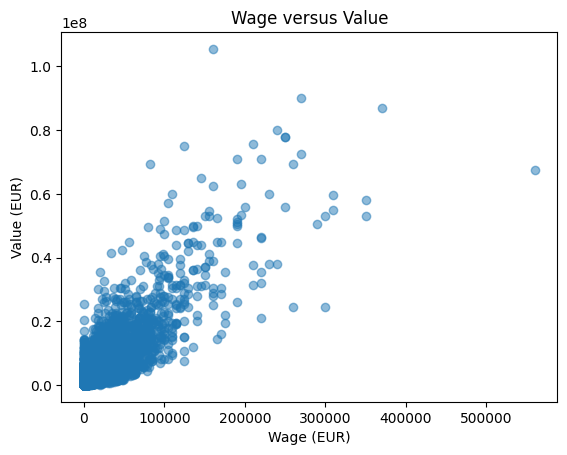

In [36]:
# Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)
# Create a scatter plot of wage versus value
plt.scatter(fifa21_df['Wage'], fifa21_df['Value'], alpha=0.5)
plt.xlabel('Wage (EUR)')
plt.ylabel('Value (EUR)')
plt.title('Wage versus Value')
plt.show()

In [37]:
# Find players who are highly valuable but underpaid (on low wages)
underpaid_players = fifa21_df[(fifa21_df['Value'] > 1e8) & (fifa21_df['Wage'] < 200000)]
print(underpaid_players[['LongName', 'Team', 'Value', 'Wage']])


        LongName                 Team      Value    Wage
6  Kylian Mbappé  Paris Saint-Germain  105500000  160000


In [39]:
# Save file:
fifa21_df.to_csv('Fifa-21-cleaned-data.csv', index=False)